# 图 (看着玩玩)

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
from pyvis.network import Network
from matplotlib.animation import FuncAnimation

## 最短路径 

部分由chat-gpt生成

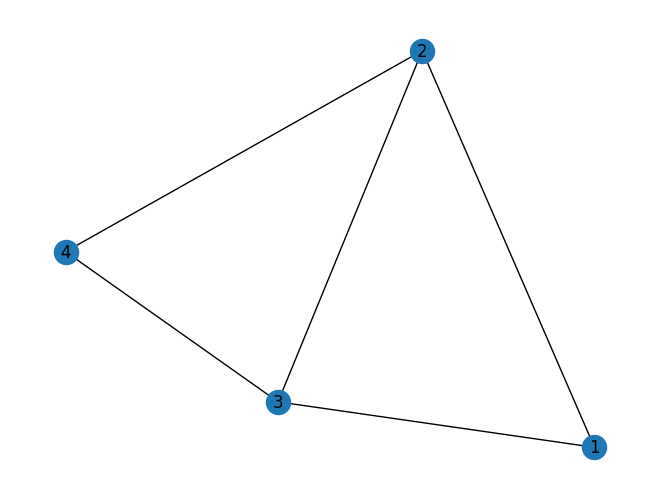

In [34]:
# Step 1: 构建图的数据结构
G = nx.Graph()
edges = [(1, 2, 3), (1, 3, 2), (2, 3, 4), (2, 4, 1), (3, 4, 5)]
G.add_weighted_edges_from(edges)

nx.draw(G, with_labels=True)

In [35]:
# Step 2: 应用最小生成树算法
mst_edges = nx.minimum_spanning_edges(G, algorithm='prim', data=False)
mst = nx.Graph(list(mst_edges))

# Step 3: 可视化
# 创建动态网络可视化对象
# nt = Network(notebook=True)
nt = Network(notebook=True, cdn_resources='local')  # 

In [37]:
# 添加原始图的节点和边
for node in G.nodes():
    nt.add_node(node)

for edge in G.edges():
    nt.add_edge(edge[0], edge[1])

# 展示原始图
nt.show("./attachments/original_graph.html", notebook=False) ## 报错：UnicodeEncodeError: 'gbk' codec can't encode character '\xa9' in position 230710: illegal multibyte sequence
# 解决：https://stackoverflow.com/questions/75596534/in-pyvis-i-get-unicodeencodeerror-charmap-codec-cant-encode-characters-in-po

# html = nt.generate_html()
# with open("original_graph.html", mode='w', encoding='utf-8') as fp:
#         fp.write(html)
# display(HTML(filename='original_graph.html')) # 不正常的显示，可使用浏览器打开.html

original_graph.html


In [40]:
# 添加最小生成树的节点和边，并用动态效果展示生成过程
nt_bfs = Network()

for node in G.nodes():
    nt_bfs.add_node(node)

for edge in mst.edges():
    nt_bfs.add_edge(edge[0], edge[1])

nt_bfs.show_buttons(filter_=['nodes', 'edges', 'physics'])
nt_bfs.show("./attachments/minimum_spanning_tree.html", notebook=False)

minimum_spanning_tree.html


In [72]:
%matplotlib qt5
fig, ax = plt.subplots()
g_pos=nx.spring_layout(G)
only_nodes = nx.Graph()
only_nodes.add_nodes_from(G.nodes)
# nx.draw(only_nodes, pos=g_pos)
nx.draw(G, pos=g_pos, edge_color='lightgreen')
def update(frame):
    edges_to_draw = list(mst.edges())[:frame + 1]
    nx.draw_networkx_edges(only_nodes, pos=g_pos, edgelist=edges_to_draw, edge_color='black')

ani = FuncAnimation(fig, update, frames=len(list(mst.edges())), interval=500, repeat=False)

## 最小费用最大流 / 运输问题

可通过线性规划解决, 也可以通过图的算法解决

- 产销平衡且确定

In [28]:
import numpy as np
import pandas as pd
c = np.array([[3, 11, 3, 10],  # c[i, j] 为从A_i到B_j的单位运费
              [1, 9, 2, 8],
              [7, 4, 10, 5]])
sales_volume = np.array([3, 6, 5, 6]) # B_j销量
production = np.array([7, 4, 9])  # A_i产量

assert np.sum(production) == np.sum(sales_volume) == 20

# 拼接 ...
d = np.vstack((c, sales_volume))
dd = (np.hstack((production, [sum(production)])))
ddd = np.concatenate((d, dd.reshape(4, 1)), axis=1) 
col = ['B1', 'B2', 'B3', 'B4', '产量']
idx = ['A1', 'A2', 'A3', '销量']

df = pd.DataFrame(ddd, idx, col)
display(df)

,B1,B2,B3,B4,产量
A1,3,11,3,10,7
A2,1,9,2,8,4
A3,7,4,10,5,9
销量,3,6,5,6,20


[线性规划解法](./Linear_Programming.ipynb)

- 产销不平衡
- 产销不确定

以上这些都是两点之间的运输, 如果加上中转点，再加个虚拟的终点，就变成了经典的流量问题